170500096/170498071 [==============================] - 774s 5us/step

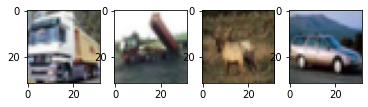

In [2]:
from keras.datasets.cifar10 import load_data
from keras.utils import np_utils
from src.models import *
from src.viz import *
import tensorflow as tf


physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)


visualize_cifar10([1,2,3,4])


def run_cfar10(name, epochs=10, lr=0.01, batch_size=32):
    (x_train, y_train), (x_test, y_test) = load_data()

    # Scale inputs from [0, 255] to [0, 1]
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    x_train = x_train / 255.0
    x_test = x_test / 255.0
    
    # One-hot encode the target labels
    y_train = np_utils.to_categorical(y_train)
    y_test = np_utils.to_categorical(y_test)
    num_classes = y_test.shape[1]
    input_shape = (32, 32, 3)
    model = create_model(name, 
                         input_shape, 
                         num_classes, 
                         epochs=epochs, 
                         lr=lr
                         )
    print(model.summary())
    print_model(model, f"img/{name}.png")

    history = model.fit(x_train, 
                        y_train, 
                        validation_data=(x_test, y_test), 
                        epochs=epochs,
                        batch_size=batch_size, 
                        verbose=1
                        )
    
    plot_history_metrics(history, ['accuracy', 'loss'])
    return history



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)              

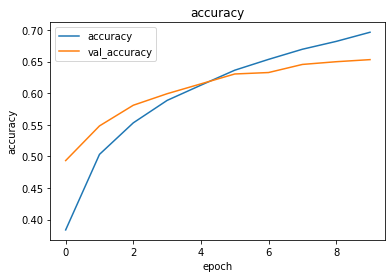

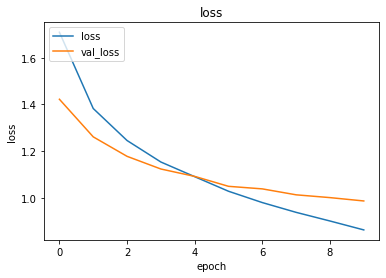

In [3]:
cnn1_history = run_cfar10('cifar_cnn_v1')


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_3 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_4 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 64)       

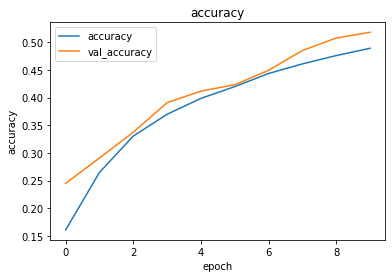

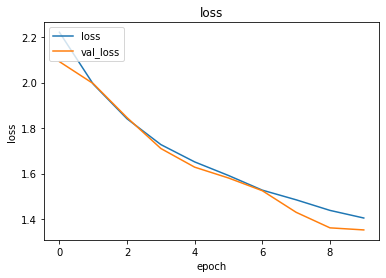

In [4]:
cnn2_history = run_cfar10('cifar_cnn_v2',
                          lr=1e-3,
                          batch_size=64
                          )

In [4]:
analyse_accuracy([cnn1_history, cnn2_history], 
                 ['cnn1_v1', 'cnn_v2'])